In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
# Load a sample (change path as needed)
df = pd.read_csv('US_Accidents_March23.csv')

# Preview
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [21]:
df.isnull()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Year
3402762,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3402767,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3402771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3402773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3402774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7728390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7728391,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7728392,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Basic cleanup
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Year'] = df['Start_Time'].dt.year

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 49 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [6]:
df.shape

(7728394, 49)

In [7]:
df.describe()

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hour,Year
count,7.728394e+06,6985228,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06,6.985228e+06,6.985228e+06
mean,2.212384e+00,2020-03-21 21:49:59.056443136,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,1.226779e+01,2.019701e+03
min,1.000000e+00,2016-01-14 20:18:33,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03
25%,2.000000e+00,2018-09-17 02:20:31.750000128,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00,8.000000e+00,2.018000e+03
50%,2.000000e+00,2020-06-23 13:37:23.500000,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,1.300000e+01,2.020000e+03
75%,2.000000e+00,2021-10-28 15:44:07,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.700000e+01,2.021000e+03
max,4.000000e+00,2023-03-31 23:30:00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,2.300000e+01,2.023000e+03
std,4.875313e-01,NaN,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01,5.455518e+00,1.888793e+00


In [8]:
df.duplicated().sum()

0

In [9]:
df.size

378691306

In [10]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                743166
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

# Weather Condition Impact

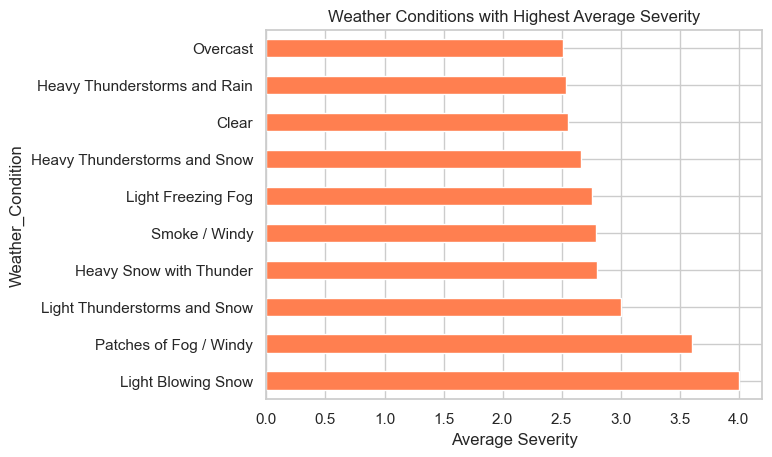

In [14]:
weather_severity = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False).head(10)
weather_severity.plot(kind='barh', color='coral')
plt.title('Weather Conditions with Highest Average Severity')
plt.xlabel('Average Severity')
plt.show()

# Accident Severity in Different Weather

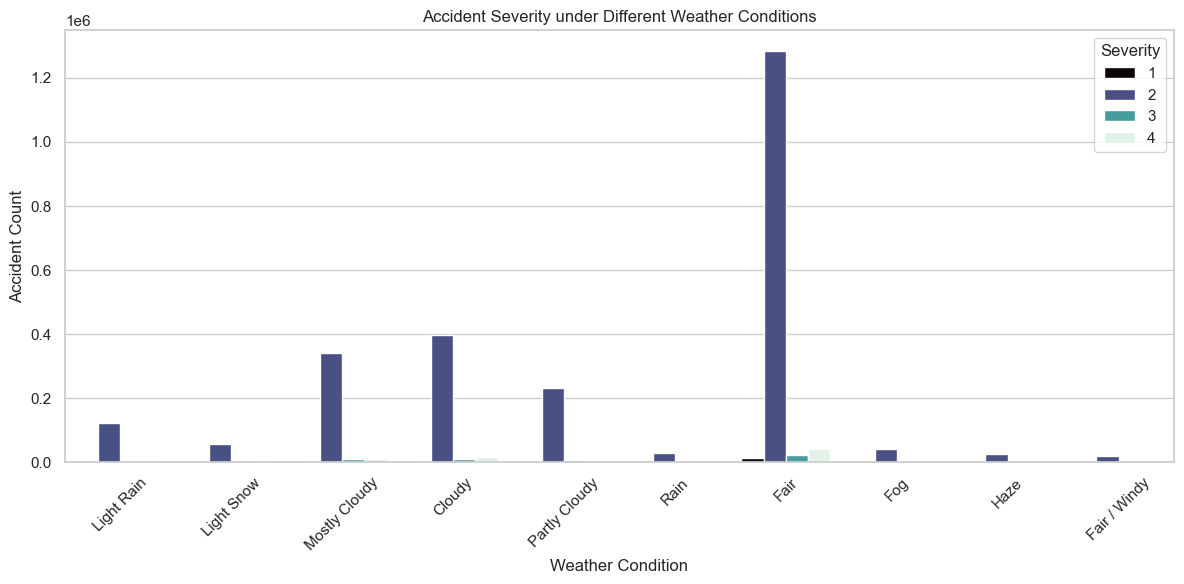

In [23]:
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
filtered_df = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Weather_Condition', hue='Severity', palette='mako')
plt.title('Accident Severity under Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time of Day Pattern

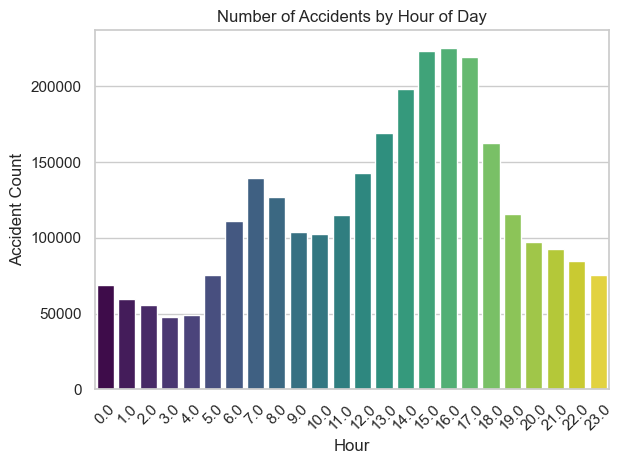

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Hour', hue='Hour', palette='viridis', legend=False)
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Heatmap of Accident Hotspots

In [124]:
heat_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000, random_state=1)

# Create map centered at US center
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap
HeatMap(data=heat_df, radius=8).add_to(m)

# To display in Jupyter/Colab:
m


# Contributing Factor Insight

## Analyze severity by visibility and wind speed

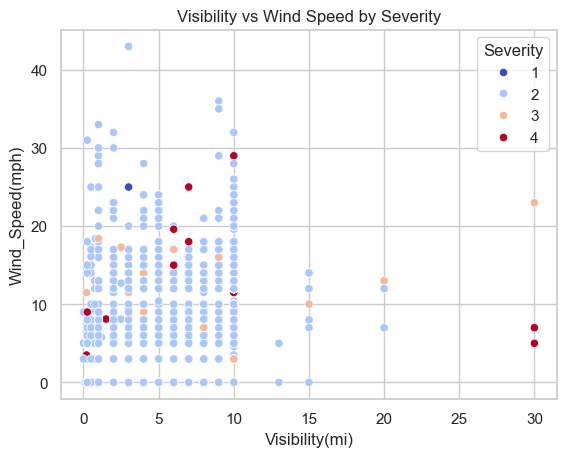

In [29]:
sns.scatterplot(data=df.sample(5000), x='Visibility(mi)', y='Wind_Speed(mph)', hue='Severity', palette='coolwarm')
plt.title('Visibility vs Wind Speed by Severity')
plt.show()

# Visibility vs. Weather Heatmap

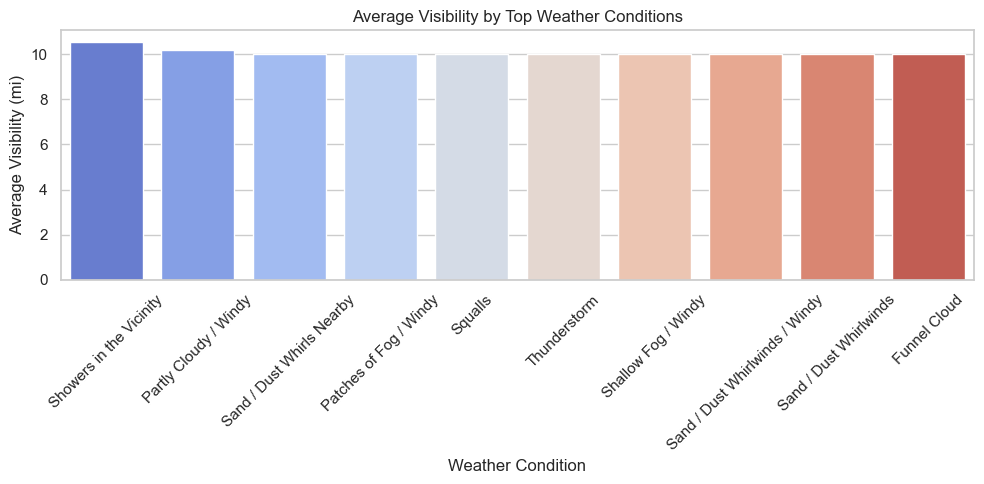

In [43]:
heatmap_df = heatmap_data.reset_index()
heatmap_df.columns = ['Weather_Condition', 'Visibility']

plt.figure(figsize=(10, 5))
sns.barplot(data=heatmap_df, x='Weather_Condition', y='Visibility', hue='Weather_Condition', dodge=False, palette='coolwarm', legend=False)
plt.title('Average Visibility by Top Weather Conditions')
plt.ylabel('Average Visibility (mi)')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Hourly Accident Severity Trend

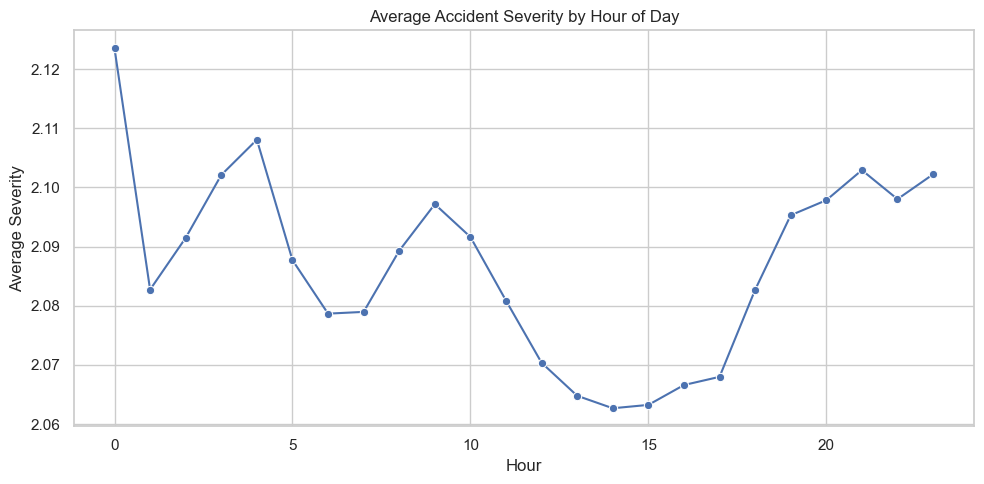

In [45]:
hourly_severity = df.groupby('Hour')['Severity'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_severity.index, y=hourly_severity.values, marker='o')
plt.title('Average Accident Severity by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Severity')
plt.grid(True)
plt.tight_layout()
plt.show()


# Accident Count by Visibility Category

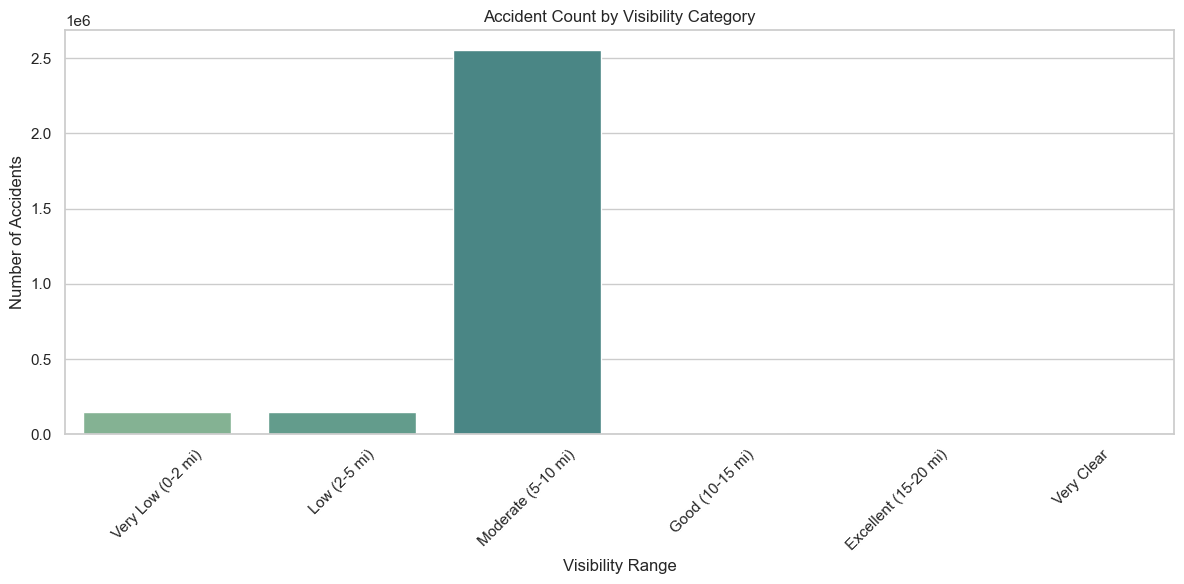

In [72]:
# Create visibility categories
bins = [0, 2, 5, 10, 15, 20, df['Visibility(mi)'].max()]
labels = ['Very Low (0-2 mi)', 'Low (2-5 mi)', 'Moderate (5-10 mi)', 
          'Good (10-15 mi)', 'Excellent (15-20 mi)', 'Very Clear']
df['Visibility_Category'] = pd.cut(df['Visibility(mi)'], bins=bins, labels=labels)

# Countplot by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Visibility_Category', order=labels, hue='Visibility_Category', palette='crest', legend=False)
plt.title('Accident Count by Visibility Category')
plt.xlabel('Visibility Range')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Weather Conditions During Accidents

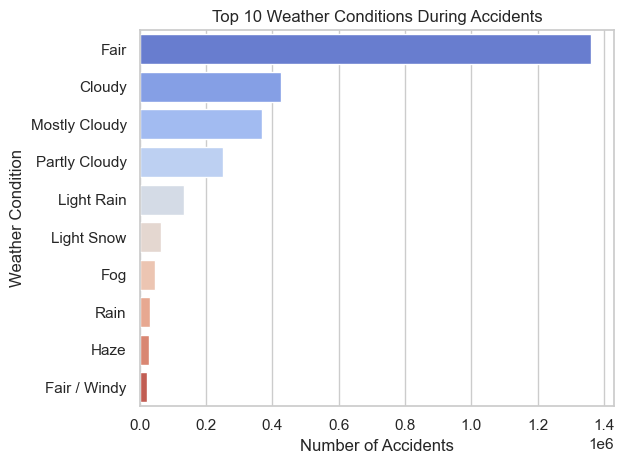

In [97]:
sns.barplot(x=top_weather.values, y=top_weather.index, hue=top_weather.index, palette='coolwarm', legend=False)
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

# Accident by Sunrise_Sunset

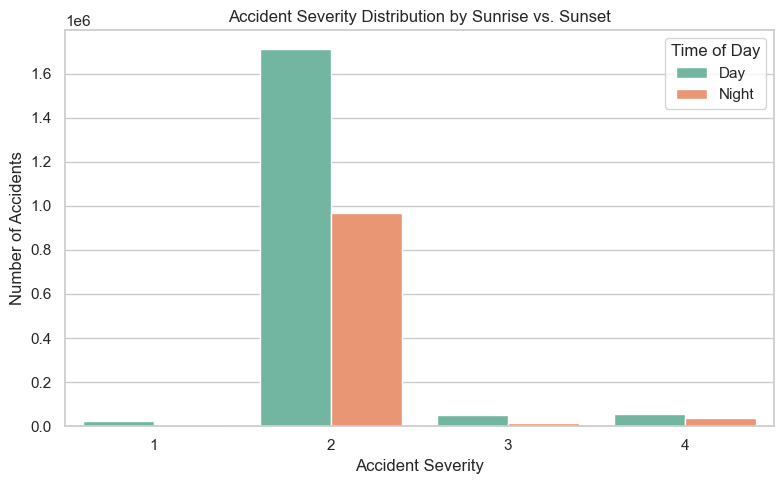

In [100]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Severity', hue='Sunrise_Sunset', palette='Set2')
plt.title('Accident Severity Distribution by Sunrise vs. Sunset')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

# Accident By Traffic Signal

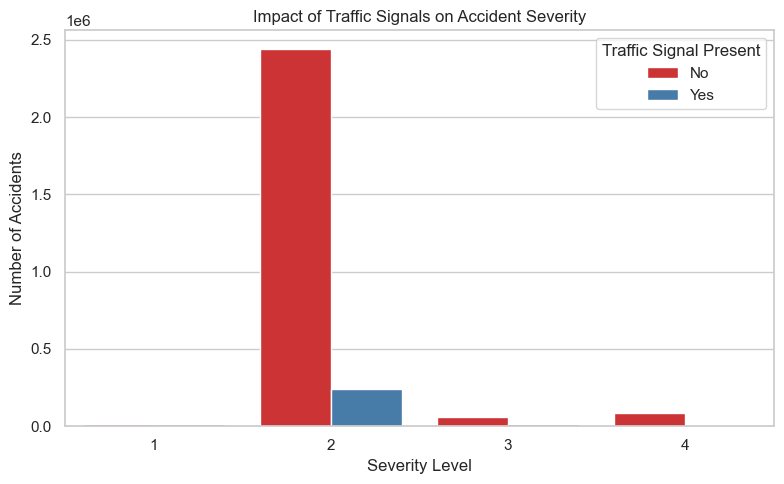

In [103]:
# Convert Traffic_Signal to Yes/No if it's boolean
df['Traffic_Signal'] = df['Traffic_Signal'].map({True: 'Yes', False: 'No'})

# Countplot of Severity by Traffic Signal presence
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Severity', hue='Traffic_Signal', palette='Set1')
plt.title('Impact of Traffic Signals on Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.legend(title='Traffic Signal Present')
plt.tight_layout()
plt.show()

# Accidents by Day of the Week

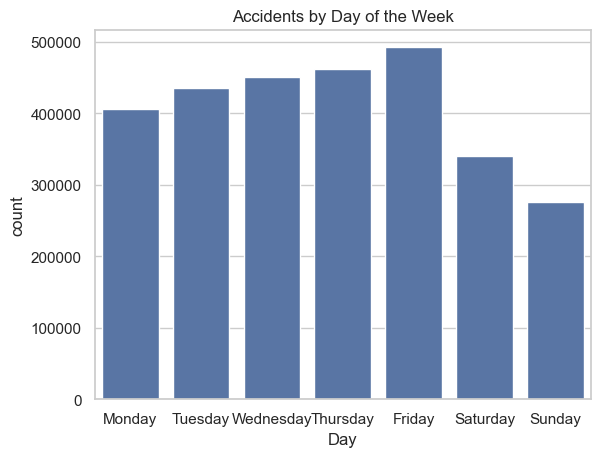

In [75]:
sns.countplot(x='Day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Accidents by Day of the Week")
plt.show()

# Accident vs Junction

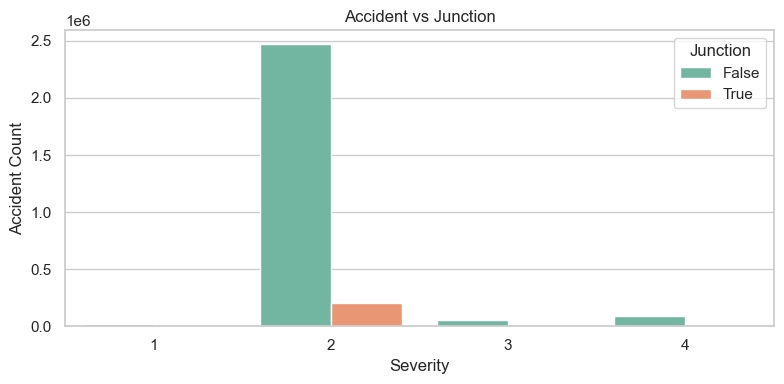

In [122]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Severity', hue='Junction', palette='Set2')
plt.title('Accident vs Junction')
plt.xlabel('Severity')
plt.ylabel('Accident Count')
plt.legend(title='Junction')
plt.tight_layout()
plt.show()


# Accident vs Nearby Amenity

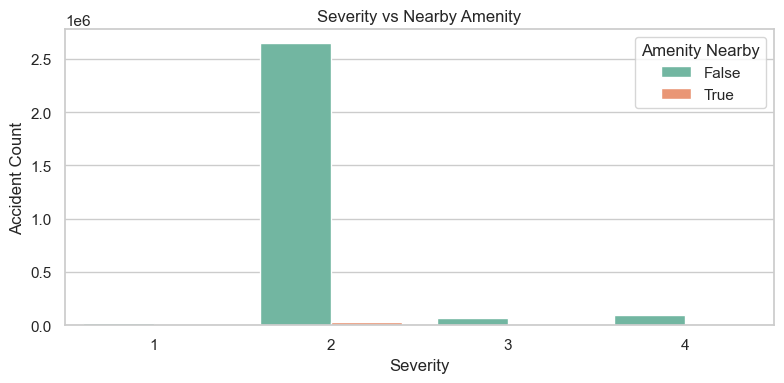

In [112]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Severity', hue='Amenity', palette='Set2')
plt.title('Severity vs Nearby Amenity')
plt.xlabel('Severity')
plt.ylabel('Accident Count')
plt.legend(title='Amenity Nearby')
plt.tight_layout()
plt.show()


# Accident vs Nearby Railway

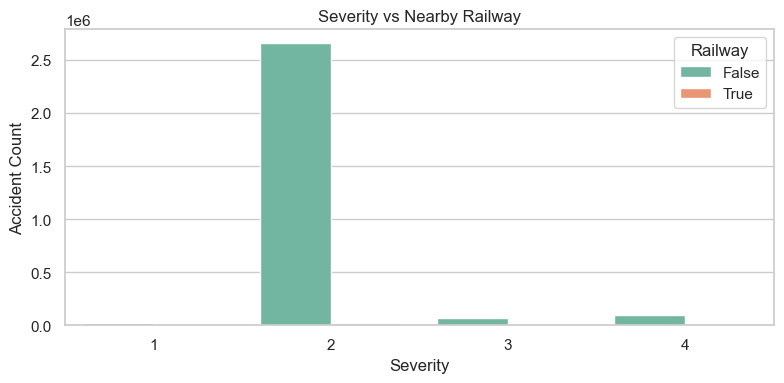

In [115]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Severity', hue='Railway', palette='Set2')
plt.title('Severity vs Nearby Railway')
plt.xlabel('Severity')
plt.ylabel('Accident Count')
plt.legend(title='Railway')
plt.tight_layout()
plt.show()


# Key Insights 
• Accidents peak during morning (7–9 AM) and evening (4–6 PM) rush hours.

• Weekdays have more accidents than weekends, especially during winter months.

• Most accidents occur in Clear, Overcast, or Rainy conditions — weather still plays a role.

• Low visibility (<3 miles) leads to a higher number of accidents and severity.

• Severe conditions like fog, snow, strong winds result in fewer but more serious crashes.

• Visibility acts as a proxy for road conditions — worse visibility = riskier roads.

• California, Texas, and Florida report the highest accident rates.

• Severity Level 2 (moderate) is the most common; Level 4 (high) occurs in poor weather or low visibility.

• Most accidents happen at normal wind speeds, indicating other factors are more influential.

• Urban areas report more accidents than rural regions due to dense traffic.